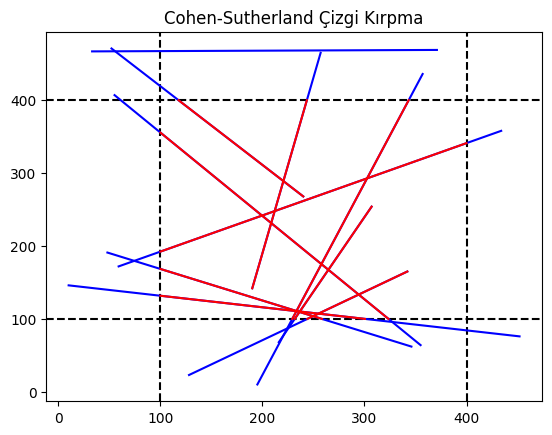

In [ ]:
import matplotlib.pyplot as plt
import random

# Pencere sınırları
x_min, y_min, x_max, y_max = 100, 100, 400, 400

ICERIDE = 0  # 0000
SOL = 1      # 0001
SAG = 2      # 0010
ALT = 4      # 0100
UST = 8      # 1000

def bit_kodu_hesapla(x, y):
    kod = ICERIDE
    if x < x_min: kod |= SOL
    elif x > x_max: kod |= SAG
    if y < y_min: kod |= ALT
    elif y > y_max: kod |= UST
    return kod

def cohen_sutherland_kirpa(x1, y1, x2, y2):
    kod1 = bit_kodu_hesapla(x1, y1)
    kod2 = bit_kodu_hesapla(x2, y2)
    kabul = False

    while True:
        if not (kod1 | kod2):
            kabul = True
            break
        elif kod1 & kod2:
            break
        else:
            x, y = 0.0, 0.0
            kod_disi = kod1 if kod1 else kod2
            if kod_disi & UST:
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif kod_disi & ALT:
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif kod_disi & SAG:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif kod_disi & SOL:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min
            if kod_disi == kod1:
                x1, y1 = x, y
                kod1 = bit_kodu_hesapla(x1, y1)
            else:
                x2, y2 = x, y
                kod2 = bit_kodu_hesapla(x2, y2)

    if kabul:
        return ((x1, y1), (x2, y2))
    return None

def rastgele_cizgiler_uret(n):
    cizgiler = []
    for _ in range(n):
        x1, y1 = random.randint(0, 500), random.randint(0, 500)
        x2, y2 = random.randint(0, 500), random.randint(0, 500)
        cizgiler.append(((x1, y1), (x2, y2)))
    return cizgiler

def cizgileri_ciz(cizgiler, renk, etiket):
    for cizgi in cizgiler:
        plt.plot([cizgi[0][0], cizgi[1][0]], [cizgi[0][1], cizgi[1][1]], color=renk)

# Rastgele çizgiler üret
cizgiler = rastgele_cizgiler_uret(10)

# Pencereyi çizme
plt.figure()
plt.axvline(x=x_min, color='black', linestyle='--')
plt.axvline(x=x_max, color='black', linestyle='--')
plt.axhline(y=y_min, color='black', linestyle='--')
plt.axhline(y=y_max, color='black', linestyle='--')

# Orijinal çizgileri çiz
cizgileri_ciz(cizgiler, 'blue', 'Orijinal Çizgiler')

# Cohen-Sutherland algoritmasını uygula ve kırpılmış çizgileri çiz
kirpilmis_cizgiler = [cohen_sutherland_kirpa(x1, y1, x2, y2) for ((x1, y1), (x2, y2)) in cizgiler]
kirpilmis_cizgiler = [cizgi for cizgi in kirpilmis_cizgiler if cizgi is not None]
cizgileri_ciz(kirpilmis_cizgiler, 'red', 'Kırpılmış Çizgiler')

plt.title('Cohen-Sutherland Çizgi Kırpma')
plt.show()


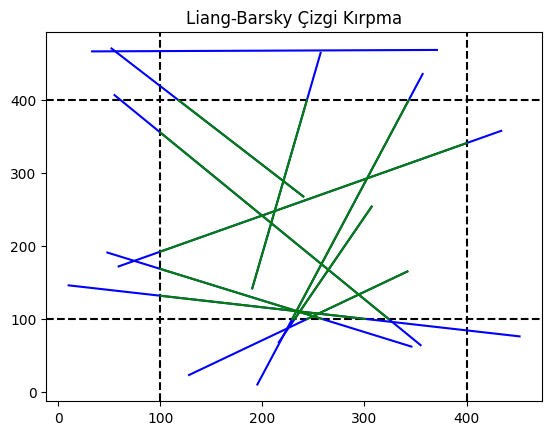

In [ ]:
def liang_barsky_kirpa(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    p = [-dx, dx, -dy, dy]
    q = [x1 - x_min, x_max - x1, y1 - y_min, y_max - y1]

    tmin, tmax = 0, 1
    for i in range(4):
        if p[i] == 0 and q[i] < 0:
            return None  # Çizgi paralel ve dışarıda
        if p[i] != 0:
            t = q[i] / p[i]
            if p[i] < 0:
                tmin = max(tmin, t)
            else:
                tmax = min(tmax, t)
            if tmin > tmax:
                return None

    x1_kirp = x1 + tmin * dx
    y1_kirp = y1 + tmin * dy
    x2_kirp = x1 + tmax * dx
    y2_kirp = y1 + tmax * dy
    return ((x1_kirp, y1_kirp), (x2_kirp, y2_kirp))

# Liang-Barsky algoritmasını uygula ve kırpılmış çizgileri çiz
plt.figure()
plt.axvline(x=x_min, color='black', linestyle='--')
plt.axvline(x=x_max, color='black', linestyle='--')
plt.axhline(y=y_min, color='black', linestyle='--')
plt.axhline(y=y_max, color='black', linestyle='--')

cizgileri_ciz(cizgiler, 'blue', 'Orijinal Çizgiler')
kirpilmis_cizgiler_lb = [liang_barsky_kirpa(x1, y1, x2, y2) for ((x1, y1), (x2, y2)) in cizgiler]
kirpilmis_cizgiler_lb = [cizgi for cizgi in kirpilmis_cizgiler_lb if cizgi is not None]
cizgileri_ciz(kirpilmis_cizgiler_lb, 'green', 'Kırpılmış Çizgiler (Liang-Barsky)')

plt.title('Liang-Barsky Çizgi Kırpma')
plt.show()
